In [89]:
import pandas as pd
df=pd.read_csv(r"C:\DataScience\Projects\NetflixAnalysis_EDA\data (1).csv")
print(df)

                     title   type  \
0                    Ariel  movie   
1      Shadows in Paradise  movie   
2             Forrest Gump  movie   
3          American Beauty  movie   
4        The Fifth Element  movie   
...                    ...    ...   
21662   Race for the Crown     tv   
21663                  NaN     tv   
21664                  NaN     tv   
21665                  NaN     tv   
21666                  NaN     tv   

                                                  genres  releaseYear  \
0                                 Comedy, Crime, Romance       1988.0   
1                                   Comedy, Drama, Music       1986.0   
2                                         Drama, Romance       1994.0   
3                                                  Drama       1999.0   
4                              Action, Adventure, Sci-Fi       1997.0   
...                                                  ...          ...   
21662                                 Docume

In [90]:
df.describe()

,releaseYear,imdbAverageRating,imdbNumVotes
count,21626.000000,19839.000000,1.983900e+04
mean,2013.334875,6.401936,3.215467e+04
std,14.299066,1.092088,1.217227e+05
min,1913.000000,1.200000,5.000000e+00
25%,2011.000000,5.800000,3.290000e+02
50%,2018.000000,6.500000,1.608000e+03
75%,2022.000000,7.200000,1.028050e+04
max,2025.000000,9.800000,3.038340e+06


In [91]:
for i in df:
    j=i.replace(' ','_')
    df=df.rename(columns={i:j.capitalize()})
    print(df)

                     Title   type  \
0                    Ariel  movie   
1      Shadows in Paradise  movie   
2             Forrest Gump  movie   
3          American Beauty  movie   
4        The Fifth Element  movie   
...                    ...    ...   
21662   Race for the Crown     tv   
21663                  NaN     tv   
21664                  NaN     tv   
21665                  NaN     tv   
21666                  NaN     tv   

                                                  genres  releaseYear  \
0                                 Comedy, Crime, Romance       1988.0   
1                                   Comedy, Drama, Music       1986.0   
2                                         Drama, Romance       1994.0   
3                                                  Drama       1999.0   
4                              Action, Adventure, Sci-Fi       1997.0   
...                                                  ...          ...   
21662                                 Docume

In [92]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21667 entries, 0 to 21666
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Title               20945 non-null  object 
 1   Type                21667 non-null  object 
 2   Genres              21296 non-null  object 
 3   Releaseyear         21626 non-null  float64
 4   Imdbid              20039 non-null  object 
 5   Imdbaveragerating   19839 non-null  float64
 6   Imdbnumvotes        19839 non-null  float64
 7   Availablecountries  160 non-null    object 
dtypes: float64(3), object(5)
memory usage: 1.3+ MB


In [93]:
df.isnull().sum()


Title                   722
Type                      0
Genres                  371
Releaseyear              41
Imdbid                 1628
Imdbaveragerating      1828
Imdbnumvotes           1828
Availablecountries    21507
dtype: int64

In [94]:
df['Genres'].fillna(df['Genres'].mode()[0],inplace=True)
df['Releaseyear'].fillna(df['Releaseyear'].mode()[0],inplace=True)
df['Imdbid'].fillna(df['Imdbid'].mode()[0],inplace=True)
df['Imdbaveragerating'].fillna(df['Imdbaveragerating'].mode()[0],inplace=True)
df['Imdbnumvotes'].fillna(df['Imdbnumvotes'].mode()[0],inplace=True)
df['Availablecountries'].fillna(df['Availablecountries'].mode()[0],inplace=True)
df['Title'].fillna(df['Title'].mode()[0],inplace=True)

C:\Users\hp\AppData\Local\Temp\ipykernel_36300\2672451478.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Genres'].fillna(df['Genres'].mode()[0],inplace=True)
C:\Users\hp\AppData\Local\Temp\ipykernel_36300\2672451478.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For e

In [95]:
df.Genres.value_counts()

Genres
Comedy                              2190
Drama                               1750
Documentary                         1015
Comedy, Drama                        835
Drama, Romance                       704
                                    ... 
Crime, Game-Show, Reality-TV           1
Adventure, Game-Show, Reality-TV       1
Action & Adventure, Crime, Drama       1
Drama, Fantasy, Musical                1
Action, Adventure, Reality-TV          1
Name: count, Length: 878, dtype: int64

1.How many movies are there in total?

In [96]:
len(df)

21667

2.What are the most common genres?

Genres
Comedy    2190
Name: count, dtype: int64


<Axes: xlabel='Genres'>

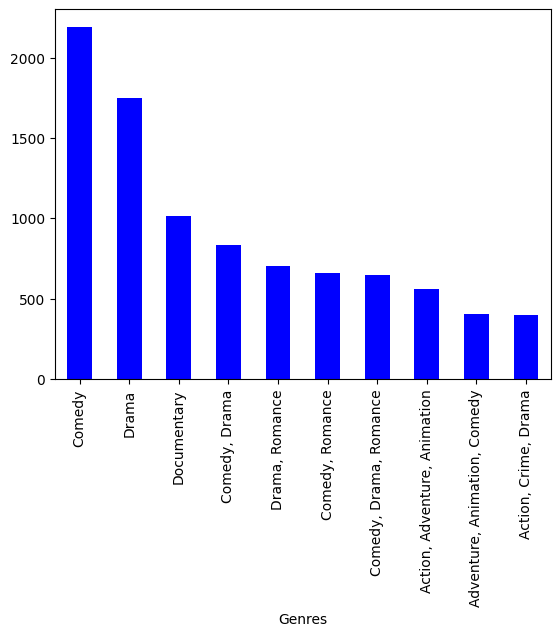

In [97]:
most_common_genre=df['Genres'].value_counts().head(1)
print(most_common_genre)


df['Genres'].value_counts().head(10).plot(kind='bar',color='blue')



3.Which movie has the highest IMDb rating?

Title                                                 Mysterious murder
Type                                                              movie
Genres                                           Crime, Horror, Mystery
Releaseyear                                                      2020.0
Imdbid                                                       tt16711732
Imdbaveragerating                                                   9.8
Imdbnumvotes                                                       24.0
Availablecountries    AD, AE, AG, AL, AO, AR, AT, AU, AZ, BA, BB, BE...
Name: 16294, dtype: object


<Axes: xlabel='Title'>

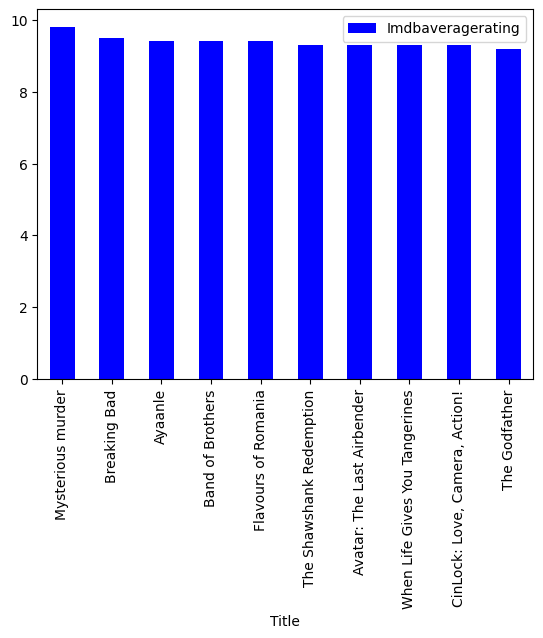

In [98]:
Highest_imdb_rating_movie = df.loc[df['Imdbaveragerating'].idxmax()]
print(Highest_imdb_rating_movie)

#Top 10 movies with highest IMDB rating
df.nlargest(10,'Imdbaveragerating')[['Title','Imdbaveragerating']].plot(x='Title',y='Imdbaveragerating',kind='bar',color='blue')

4.Which genre has the highest median IMDb rating (among genres with at least 10 movies)?


In [99]:
Genre_medians = df.explode('Genres').groupby('Genres').filter(lambda x: len(x) >= 10).groupby('Genres')['Imdbaveragerating'].median().sort_values(ascending=False)
print(Genre_medians)


Genres
Animation, Drama, Family           7.65
Animation, Comedy, Drama           7.60
Biography, Documentary, History    7.60
Animation, Drama, Fantasy          7.50
Documentary, Family                7.45
                                   ... 
Horror, Thriller                   5.30
Horror                             5.30
Drama, Horror, Thriller            5.30
Comedy, Musical                    5.25
Action, Comedy, Family             4.95
Name: Imdbaveragerating, Length: 233, dtype: float64


C:\Users\hp\AppData\Local\Temp\ipykernel_36300\1634198552.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=Genre_medians.values, y=Genre_medians.index, palette='viridis')


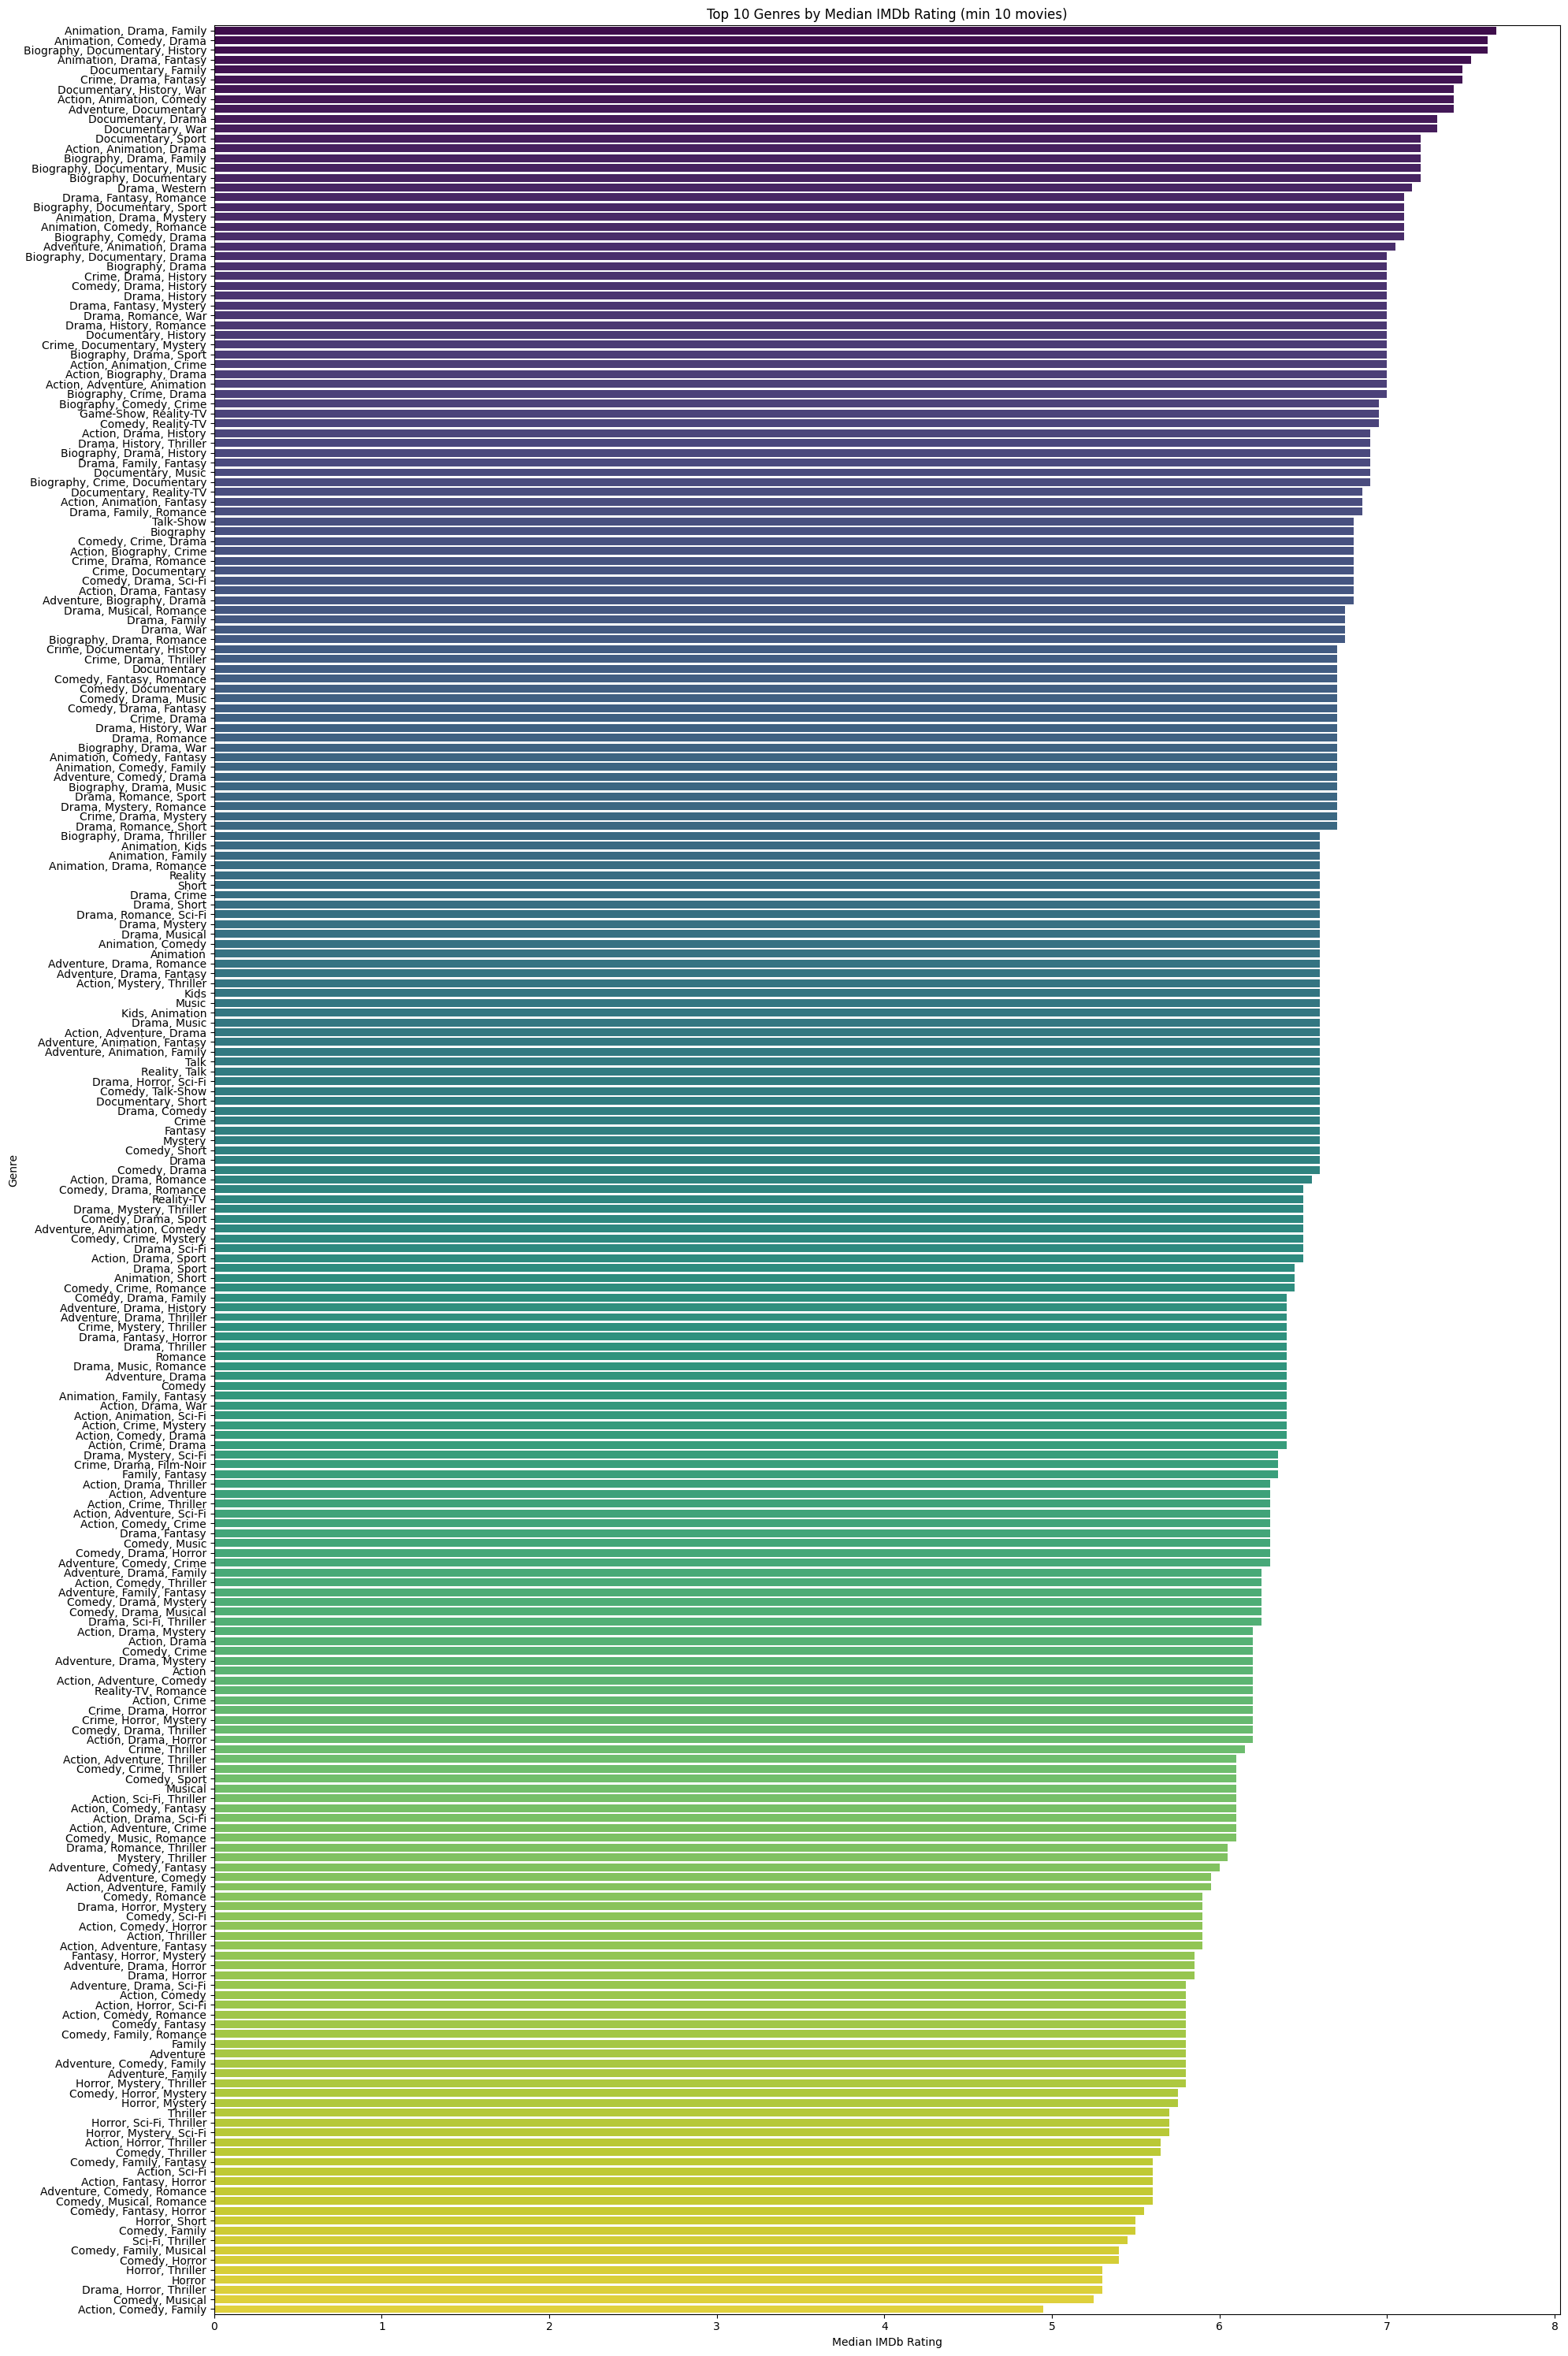

In [100]:
import seaborn as sns
import matplotlib.pyplot as plt



plt.figure(figsize=(20, 30))
sns.barplot(x=Genre_medians.values, y=Genre_medians.index, palette='viridis')
plt.title("Top 10 Genres by Median IMDb Rating (min 10 movies)")
plt.xlabel("Median IMDb Rating")
plt.ylabel("Genre")
plt.tight_layout()
plt.show()

5.List the top 3 movies with the highest rating-to-votes ratio.

In [103]:

filtered_df = df[(df['Imdbnumvotes'] > 0) & (df['Imdbaveragerating'].notnull())]
filtered_df['rating_to_votes_ratio'] = filtered_df['Imdbaveragerating'] / filtered_df['Imdbnumvotes']


top_3 = filtered_df.sort_values(by='rating_to_votes_ratio', ascending=False).head(3)
print(top_3[['Title', 'Imdbaveragerating', 'Imdbnumvotes', 'rating_to_votes_ratio']])


                             Title  Imdbaveragerating  Imdbnumvotes  \
15429                       Refuse                9.0           5.0   
13470  Ghost blows out the light 2                8.4           5.0   
13080            Into the Darkness                8.2           5.0   

       rating_to_votes_ratio  
15429                   1.80  
13470                   1.68  
13080                   1.64  


C:\Users\hp\AppData\Local\Temp\ipykernel_36300\2089332304.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x= top_3['rating_to_votes_ratio'], y=top_3['Title'], palette='Set2')


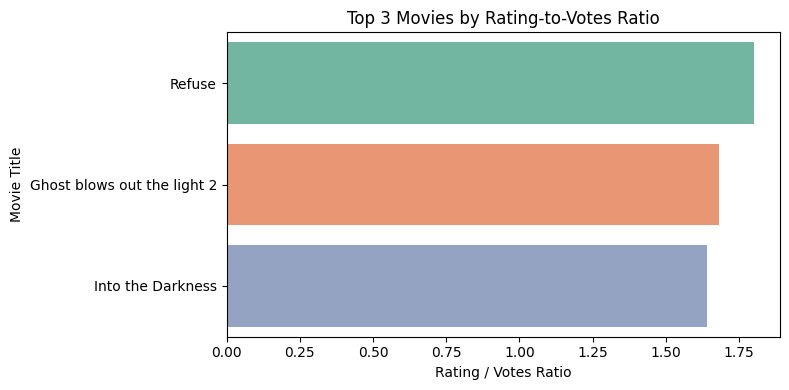

In [102]:
plt.figure(figsize=(8, 4))
sns.barplot(x= top_3['rating_to_votes_ratio'], y=top_3['Title'], palette='Set2')
plt.title("Top 3 Movies by Rating-to-Votes Ratio")
plt.xlabel("Rating / Votes Ratio")
plt.ylabel("Movie Title")
plt.tight_layout()
plt.show()

6.Find duplicate movie titles (same title but different years or genres).

In [ ]:
df[df.duplicated('Title', keep=False)].sort_values('Title')



,Title,Type,Genres,Releaseyear,Imdbid,Imdbaveragerating,Imdbnumvotes,Availablecountries
16717,19-2,tv,"Crime, Drama",2011.0,tt1840973,8.6,1816.0,"AD, AE, AG, AL, AO, AR, AT, AU, AZ, BA, BB, BE..."
17165,19-2,tv,"Crime, Drama",2014.0,tt3340712,8.1,3420.0,"AD, AE, AG, AL, AO, AR, AT, AU, AZ, BA, BB, BE..."
1611,3 Idiots,movie,"Comedy, Drama",2009.0,tt1187043,8.4,457542.0,"AD, AE, AG, AL, AO, AR, AT, AU, AZ, BA, BB, BE..."
6777,3 Idiots,movie,Comedy,2017.0,tt3685624,4.4,1599.0,"AD, AE, AG, AL, AO, AR, AT, AU, AZ, BA, BB, BE..."
16315,A Breath Away,movie,Comedy,2025.0,tt31805297,6.6,18.0,"AD, AE, AG, AL, AO, AR, AT, AU, AZ, BA, BB, BE..."
...,...,...,...,...,...,...,...,...
15301,Zion,movie,Comedy,2022.0,tt31805297,6.6,18.0,"AD, AE, AG, AL, AO, AR, AT, AU, AZ, BA, BB, BE..."
8327,Zoe,movie,"Drama, Romance, Sci-Fi",2018.0,tt6010628,6.1,10716.0,"AD, AE, AG, AL, AO, AR, AT, AU, AZ, BA, BB, BE..."
11653,Zoe,movie,Mystery,2018.0,tt5969746,6.6,18.0,"AD, AE, AG, AL, AO, AR, AT, AU, AZ, BA, BB, BE..."
14727,Zom 100: Bucket List of the Dead,movie,"Action, Comedy, Fantasy",2023.0,tt20672534,5.5,7428.0,"AD, AE, AG, AL, AO, AR, AT, AU, AZ, BA, BB, BE..."


7.Total IMDb Votes per Genre

C:\Users\hp\AppData\Local\Temp\ipykernel_36300\1306465153.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_votes.values, y=genre_votes.index, palette='mako')


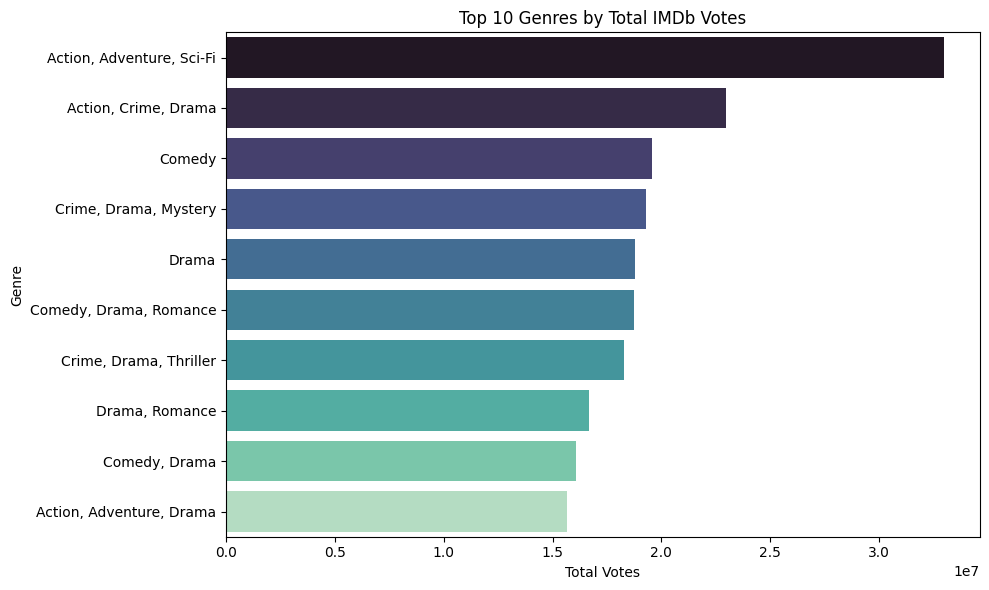

In [119]:
genre_votes = (
    df.explode('Genres')
      .groupby('Genres')['Imdbnumvotes']
      .sum()
      .sort_values(ascending=False)
      .head(10)
)

plt.figure(figsize=(10, 6))
sns.barplot(x=genre_votes.values, y=genre_votes.index, palette='mako')
plt.title("Top 10 Genres by Total IMDb Votes")
plt.xlabel("Total Votes")
plt.ylabel("Genre")
plt.tight_layout()
plt.show()


8.Highly-Rated Movies Over Decades (IMDb > 8.5)

C:\Users\hp\AppData\Local\Temp\ipykernel_36300\1290872665.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=decade_counts.index.astype(str), y=decade_counts.values, palette='rocket')


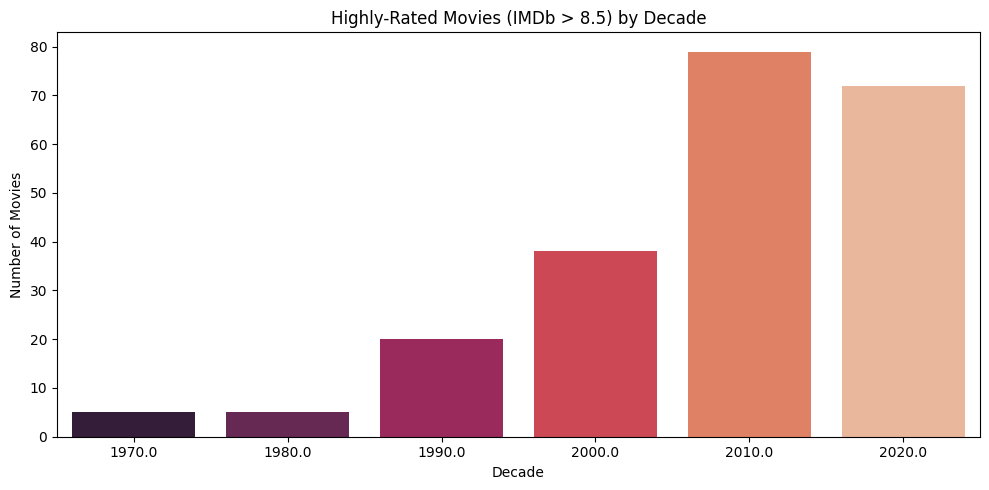

In [125]:
df['decade'] = (df['Releaseyear'] // 10) * 10
decade_counts = df[df['Imdbaveragerating'] > 8.5]['decade'].value_counts().sort_index()

plt.figure(figsize=(10, 5))
sns.barplot(x=decade_counts.index.astype(str), y=decade_counts.values, palette='rocket')
plt.title("Highly-Rated Movies (IMDb > 8.5) by Decade")
plt.xlabel("Decade")
plt.ylabel("Number of Movies")
plt.tight_layout()
plt.show()


### Conclusion for the Netflix EDA Project

This exploratory data analysis (EDA) of the Netflix dataset provided valuable insights into the platform's movie catalog. Below are the key takeaways:

1. **Dataset Overview**:
   - The dataset was successfully loaded and cleaned by handling missing values and renaming columns for consistency.
   - Key statistics and metadata about the dataset were explored using `df.describe()` and `df.info()`.

2. **Insights Derived**:
   - **Total Movies**: The total number of movies in the dataset was calculated.
   - **Most Common Genres**: The most frequent genres were identified and visualized, providing insights into popular content categories.
   - **Highest IMDb Rating**: The movie with the highest IMDb rating was identified, along with the top 10 highest-rated movies.
   - **Genre Analysis**: Genres with the highest median IMDb ratings (with at least 10 movies) were analyzed, highlighting quality content categories.
   - **Rating-to-Votes Ratio**: The top 3 movies with the highest rating-to-votes ratio were identified, showcasing movies that received high ratings despite fewer votes.
   - **Duplicate Titles**: Duplicate movie titles (same title but different years or genres) were identified for further investigation.
   - **IMDb Votes by Genre**: The total IMDb votes per genre were calculated, showing which genres attract the most audience engagement.
   - **Highly-Rated Movies Over Decades**: Trends in highly-rated movies (IMDb > 8.5) over decades were visualized, revealing shifts in audience preferences over time.

3. **Visualizations**:
   - Bar plots and other visualizations were used to effectively communicate findings, such as genre popularity, IMDb ratings, and decade-wise trends.

4. **Data Cleaning**:
   - Missing values in key columns like `Genres`, `Releaseyear`, and `Imdbaveragerating` were filled using the mode, ensuring the dataset was complete for analysis.

### Recommendations:
- **Content Strategy**: Focus on producing or acquiring content in genres with high median IMDb ratings and significant audience engagement.
- **Audience Trends**: Leverage insights from decade-wise trends to cater to evolving audience preferences.
- **Data Quality**: Ensure consistent and accurate metadata for movies to improve future analyses.

This project demonstrates the power of EDA in uncovering actionable insights from data, providing a foundation for data-driven decision-making.